## Binary Classification

### Preprocess the data using the Z-score normalization, and randomly split the data into a training set and a test set using the hold-out scheme: 70% of samples for training and the other 30% for testing

In [1]:
import pandas as pd

df_a = pd.read_csv('DataA1.csv')
df_a.describe()


,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature49,Feature50,Feature51,Feature52,Feature53,Feature54,Feature55,Feature56,Feature57,Label
0,1,2,1,2,1,2,3,3,3,3,...,3,2,3,4,2,2,2,2,1,1
1,3,3,4,2,1,2,2,4,3,2,...,1,4,3,4,4,4,1,3,4,1
2,4,1,4,4,4,4,1,1,2,1,...,1,2,1,1,4,2,2,4,4,1
3,1,4,1,1,3,3,4,4,3,4,...,1,3,3,4,1,3,3,4,2,-1
4,3,4,4,3,1,1,4,4,4,1,...,3,1,3,2,1,4,2,1,1,-1


In [2]:
from sklearn import preprocessing

df_y = df_a['Label']
df_z = df_a.drop('Label', axis=1)

std_scaler = preprocessing.StandardScaler()
std_transformer = std_scaler.fit_transform(df_a)
df_standardized_features = pd.DataFrame(std_transformer, index=df_a.index, columns=df_a.columns) 
df_standardized_features['Label']=df_y
df_standardized_features.describe()
df_standardized_features.count().count()

58

In [3]:
from sklearn.model_selection import train_test_split

X = df_standardized_features.copy()
X.drop('Label',axis=1,inplace=True)
Y = df_y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
Y_train.count()

1540

In [4]:
Y_test.count()

660

### Use 5-fold cross validation on the training set to select the parameters k for k-NN from the set [1, 3, 5, 7, ..., 31]. Plot a figure that shows the relationship between the accuracy and the parameter k. Report the best k in terms of classification accuracy

Text(0, 0.5, 'Accuracy')

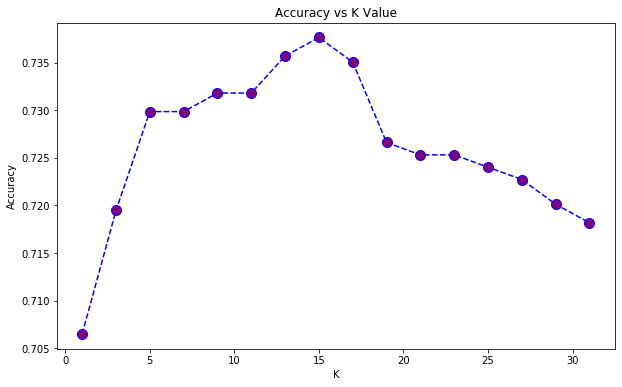

In [23]:
import numpy as np
# from scipy import stats
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

kNN_Accuracy = []
for i in range(1,32,2):
    kNN = KNeighborsClassifier(n_neighbors=i)
    #cross validation accuracy score using 5 fold validation for k neighbors
    c_val_score = cross_val_score(kNN,X_train,Y_train, cv=5, scoring='accuracy')
    kNN_Accuracy.append(np.average(c_val_score))
# sorted_tuples = sorted(svm_Accuracy, key=lambda x: x[1])
# print(sorted_tuples)

plt.figure(figsize=(10,6))
plt.plot(range(1,33,2),kNN_Accuracy,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='purple',markersize=10)
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [24]:
max(kNN_Accuracy)

0.7376623376623377

Based on the depicted graph, the K-value associated with the highest accuracy is 15, yielding an accuracy rate of 0.7376623376623377.

## For the RBF kernel SVM, there are two parameters to be decided: the soft margin penalty term c and the kernel width parameter gamma. Again use 5-fold cross validation on the training set to select the parameter c from the set [0.1, 0.5, 1, 2, 5, 10, 20, 50] and select the parameter gamma from the set [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]. Report the best parameters in terms of classification accuracy. 

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_rbf = SVC(kernel='linear',random_state=0)
params = [{'C':[0.1, 0.5, 1, 2, 5,10, 20, 50],'kernel':['rbf'],'gamma':[0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]}]
grid_search = GridSearchCV(estimator=svm_rbf,param_grid=params,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_model = grid_search.fit(X_train,Y_train)
accuracy_grid = grid_search.best_score_
accuracy_grid

0.9045454545454547

In [26]:
grid_search_model.best_params_


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

The accuracy of the best parameters is 0.9045454545454547
and the best parameters are {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}.

### Using the chosen parameters from the above parameter selection process for k-NN and SVM, and the default setups for Naïve Bayes classifier and Decision Tree, classify the test set. Repeat each classification method 20 times by varying the split of training-test set as in Step (1). Report the average and standard deviation of classification performance on the test set regarding accuracy, precision, recall, and F1-score. 

In [40]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

np.random.seed(42)

kNN_accuracy = []
kNN_precision = []
kNN_recall = []
kNN_f1score = []

kNN_Classifier = KNeighborsClassifier(n_neighbors=15)
kNN_Classifier = kNN_Classifier.fit(X_train,Y_train)

svm_accuracy = []
svm_precision = []
svm_recall = []
svm_f1score = []

svm_Classifier = SVC(kernel='rbf',C=10,gamma=0.01,random_state=0)
svm_Classifier = svm_Classifier.fit(X_train,Y_train)

nb_accuracy = []
nb_precision = []
nb_recall = []
nb_f1score = []

nb_Classifier = GaussianNB()
nb_Classifier = nb_Classifier.fit(X, Y)

dtree_accuracy = []
dtree_precision = []
dtree_recall = []
dtree_f1score = []

dtree_classifier = DecisionTreeClassifier(random_state=42)
dtree_classifier = dtree_classifier.fit(X_train,Y_train)

for i in range(1,20):
    test_split = np.random.rand()
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_split, random_state=42)
    
    ### kNN Classifier
    predictions = kNN_Classifier.predict(X_test)
    report = classification_report(Y_test, predictions, output_dict=True)
    accuracy = accuracy_score(Y_test, predictions)
    weighted_avg_precision = report['weighted avg']['precision']
    weighted_avg_recall = report['weighted avg']['recall']
    weighted_avg_f1_score = report['weighted avg']['f1-score']

    kNN_accuracy.append(accuracy)
    kNN_precision.append(weighted_avg_precision)
    kNN_recall.append(weighted_avg_recall)
    kNN_f1score.append(weighted_avg_f1_score)

    ### SVM Classifier
    predictions = svm_Classifier.predict(X_test)
    report = classification_report(Y_test, predictions, output_dict=True)
    accuracy = accuracy_score(Y_test, predictions)
    weighted_avg_precision = report['weighted avg']['precision']
    weighted_avg_recall = report['weighted avg']['recall']
    weighted_avg_f1_score = report['weighted avg']['f1-score']
    
    svm_accuracy.append(accuracy)
    svm_precision.append(weighted_avg_precision)
    svm_recall.append(weighted_avg_recall)
    svm_f1score.append(weighted_avg_f1_score)

    ### NB Classifier
    predictions = nb_Classifier.predict(X_test)
    report = classification_report(Y_test, predictions, output_dict=True)
    accuracy = accuracy_score(Y_test, predictions)
    weighted_avg_precision = report['weighted avg']['precision']
    weighted_avg_recall = report['weighted avg']['recall']
    weighted_avg_f1_score = report['weighted avg']['f1-score']

    nb_accuracy.append(accuracy)
    nb_precision.append(weighted_avg_precision)
    nb_recall.append(weighted_avg_recall)
    nb_f1score.append(weighted_avg_f1_score)

    ### Decision Tree Classifier
    predictions = dtree_classifier.predict(X_test)
    report = classification_report(Y_test, predictions, output_dict=True)
    accuracy = accuracy_score(Y_test, predictions)
    weighted_avg_precision = report['weighted avg']['precision']
    weighted_avg_recall = report['weighted avg']['recall']
    weighted_avg_f1_score = report['weighted avg']['f1-score']

    dtree_accuracy.append(accuracy)
    dtree_precision.append(weighted_avg_precision)
    dtree_recall.append(weighted_avg_recall)
    dtree_f1score.append(weighted_avg_f1_score)

0.3745401188473625
0.9507143064099162
0.7319939418114051
0.5986584841970366
0.15601864044243652
0.15599452033620265
0.05808361216819946
0.8661761457749352
0.6011150117432088
0.7080725777960455
0.020584494295802447
0.9699098521619943
0.8324426408004217
0.21233911067827616
0.18182496720710062
0.18340450985343382
0.3042422429595377
0.5247564316322378
0.43194501864211576


In [39]:
# Initialize the DataFrame
statInfo = pd.DataFrame()

# kNN
kNN_descr_avg = pd.DataFrame({
    'Average': [np.average(kNN_accuracy), np.average(kNN_precision), np.average(kNN_recall), np.average(kNN_f1score)],
    'Standard Deviation': [np.std(kNN_accuracy), np.std(kNN_precision), np.std(kNN_recall), np.std(kNN_f1score)]
}, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

statInfo = pd.concat([statInfo, kNN_descr_avg], axis=1)

# SVM
svm_descr_avg = pd.DataFrame({
    'Average': [np.average(svm_accuracy), np.average(svm_precision), np.average(svm_recall), np.average(svm_f1score)],
    'Standard Deviation': [np.std(svm_accuracy), np.std(svm_precision), np.std(svm_recall), np.std(svm_f1score)]
}, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

statInfo = pd.concat([statInfo, svm_descr_avg], axis=1)

# Naive Bayes
nb_descr_avg = pd.DataFrame({
    'Average': [np.average(nb_accuracy), np.average(nb_precision), np.average(nb_recall), np.average(nb_f1score)],
    'Standard Deviation': [np.std(nb_accuracy), np.std(nb_precision), np.std(nb_recall), np.std(nb_f1score)]
}, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

statInfo = pd.concat([statInfo, nb_descr_avg], axis=1)

# Decision Tree
dtree_descr_avg = pd.DataFrame({
    'Average': [np.average(dtree_accuracy), np.average(dtree_precision), np.average(dtree_recall), np.average(dtree_f1score)],
    'Standard Deviation': [np.std(dtree_accuracy), np.std(dtree_precision), np.std(dtree_recall), np.std(dtree_f1score)]
}, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

statInfo = pd.concat([statInfo, dtree_descr_avg], axis=1)

# Organize data
statInfo.columns = pd.MultiIndex.from_arrays([
    ['kNN', 'kNN', 'SVM', 'SVM', 'Naive Bayes', 'Naive Bayes', 'Decision Tree', 'Decision Tree'],
    ['Average', 'Standard Deviation', 'Average', 'Standard Deviation', 'Average', 'Standard Deviation', 'Average', 'Standard Deviation']
])

statInfo

kNN                          SVM                     \
            Average Standard Deviation   Average Standard Deviation   
Accuracy   0.731092           0.013327  0.929573           0.022027   
Precision  0.809097           0.013609  0.929927           0.022011   
Recall     0.731092           0.013327  0.929573           0.022027   
F1 Score   0.714848           0.015871  0.929576           0.022036   

          Naive Bayes                       D Tree                     
              Average Standard Deviation   Average Standard Deviation  
Accuracy     0.880372           0.005373  0.945428           0.019135  
Precision    0.881070           0.006435  0.945550           0.019214  
Recall       0.880372           0.005373  0.945428           0.019135  
F1 Score     0.880296           0.005356  0.945426           0.019141

The decision tree classification exhibited the highest accuracy among all methods. However, it's noteworthy that the standard deviation of the Naive Bayes method was the lowest, implying that its results were the most consistent and reproducible.